In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [578]:
img = cv2.imread('./flickr30K_images/flickr30K_images/13648274.jpg')

In [ ]:
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [4]:
img.shape

(375, 500, 3)

In [6]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(375, 500)

In [ ]:
cv2.imwrite('graytest.jpg',gray)

## GAMMA CORRECTION

In [135]:
def adjust_gamma(image, gamma=1.0):
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(image, table)

In [136]:
adjusted_ = adjust_gamma(img, gamma=0.3)

In [137]:
adjusted = cv2.cvtColor(adjusted_, cv2.COLOR_BGR2RGB)

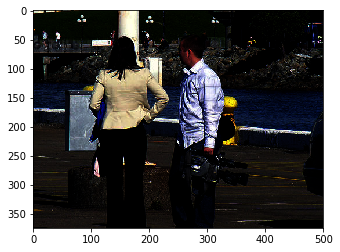

In [138]:
plt.imshow(adjusted)
plt.show()

## NOISE

In [268]:
PEAK = 1.1
noisy = np.uint8(np.random.poisson(adjusted_ / 255.0 * PEAK) / PEAK * 255)
noisy = adjusted_ + noisy

In [269]:
noisy = cv2.cvtColor(noisy, cv2.COLOR_BGR2RGB)

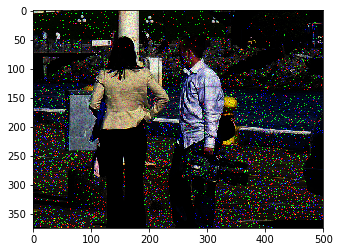

In [270]:
plt.imshow(noisy)
plt.show()

## WHITE BALANCE

In [409]:
white_unbalaced =  np.zeros((375,500,3), dtype='uint8')
random_vals = np.random.uniform(0.5, 1.0, 3)
white_unbalaced[:,:,0] = np.int8(random_vals[0] * img[:,:,0])
white_unbalaced[:,:,1] = np.int8(random_vals[1] * img[:,:,1])
white_unbalaced[:,:,2] = np.int8(random_vals[2] * img[:,:,2])

In [410]:
white_unbalaced = cv2.cvtColor(white_unbalaced, cv2.COLOR_BGR2RGB)

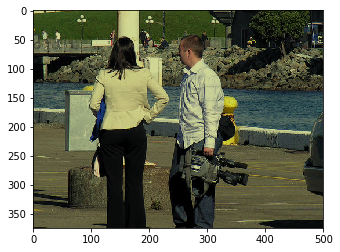

In [411]:
plt.imshow(white_unbalaced)
plt.show()

## BLACK LEVEL

In [584]:
black_level = img

In [585]:
LEVEL = 50
black_level[black_level<LEVEL] = LEVEL
black_level = black_level - LEVEL
# black_level = np.uint8(black_level)

In [586]:
black_level[2][-1]

array([0, 0, 0], dtype=uint8)

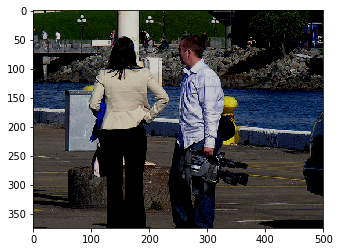

In [587]:
black_level = cv2.cvtColor(black_level, cv2.COLOR_BGR2RGB)
plt.imshow(black_level)
plt.show()

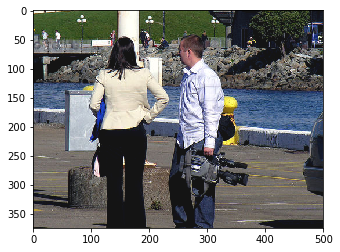

In [583]:
img_ = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_)
plt.show()

In [577]:
img[2][-1]

array([50, 50, 50], dtype=uint8)

In [ ]:
skimage.util.random_noise(image, mode='gaussian', seed=None, clip=True, **kwargs)